# Optimisez la gestion des données d'une boutique avec R ou Python 

# Boutique de vin

# Initialisation


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_web = pd.read_excel ("web.xlsx") 

In [3]:
df_erp = pd.read_excel ("erp.xlsx") 

In [4]:
df_liaison = pd.read_excel ("liaison.xlsx") 

# Analyse ERP

In [5]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [6]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [7]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [8]:
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [9]:
df_erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

# Analyse Fichier de liaison 

In [10]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [11]:
df_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [12]:
df_liaison.nunique()

product_id    825
id_web        734
dtype: int64

In [13]:
df_global = df_liaison.merge(df_erp,on='product_id',indicator = True,how = 'outer')
df_global

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
...,...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock,both
821,7204,NaN,0,45.0,9,instock,both
822,7247,13127-1,1,54.8,23,instock,both
823,7329,14680-1,0,26.5,14,instock,both


In [14]:
df_global[df_global['_merge']!='both']

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge


In [15]:
df_global.drop(["_merge"], axis=1, inplace=True)

# Analyse Web


In [16]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [18]:
df_web.drop(["tax_class","post_content","post_password","post_content_filtered"], axis=1, inplace=True)
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
df_web.isnull().sum()

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

In [20]:
df_web.nunique()

sku                   714
virtual                 1
downloadable            1
rating_count            1
average_rating          1
total_sales            41
tax_status              1
post_author             2
post_date             716
post_date_gmt         716
post_title            713
post_excerpt          679
post_status             1
comment_status          1
ping_status             1
post_name             716
post_modified         589
post_modified_gmt     589
post_parent             1
guid                 1430
menu_order              1
post_type               2
post_mime_type          1
comment_count           1
dtype: int64

In [21]:
df_web["post_title"].sort_values()

610     Agnès Levet Côte Rôtie Améthyste 2017
1381    Agnès Levet Côte Rôtie Améthyste 2017
611      Agnès Levet Côte Rôtie Maestria 2017
1382     Agnès Levet Côte Rôtie Maestria 2017
612      Agnès Levet Côte Rôtie Péroline 2017
                        ...                  
792                                       NaN
793                                       NaN
794                                       NaN
795                                       NaN
796                                       NaN
Name: post_title, Length: 1513, dtype: object

On remarque qu'il y a des lignes en double, on va essayer de les assembler 


In [22]:
df_web[df_web["post_title"] == "Agnès Levet Côte Rôtie Améthyste 2017"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
610,15325,0,0,0,0.0,4.0,taxable,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,...,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1381,15325,0,0,0,0.0,4.0,NaN,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,...,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
df_web[df_web["post_type"] == "product" ]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On remarque la presence de doublons sur tout les articles , on va se baser sur ceux décrit par "product"

In [24]:
df_web_sans_doublons = df_web[df_web["post_type"] == "product" ]
df_web_sans_doublons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [25]:
df_web_sans_doublons.nunique()

sku                  714
virtual                1
downloadable           1
rating_count           1
average_rating         1
total_sales           41
tax_status             1
post_author            2
post_date            716
post_date_gmt        716
post_title           713
post_excerpt         679
post_status            1
comment_status         1
ping_status            1
post_name            716
post_modified        589
post_modified_gmt    589
post_parent            1
guid                 716
menu_order             1
post_type              1
post_mime_type         0
comment_count          1
dtype: int64

In [26]:
df_web_sans_doublons[df_web_sans_doublons["sku"].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [27]:
df_web_sans_doublons = df_web_sans_doublons[df_web_sans_doublons["sku"].notnull()]
df_web_sans_doublons

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# Analyse de Liaison

In [28]:
df_liaison.nunique()

product_id    825
id_web        734
dtype: int64

In [29]:
df_global = df_global.merge(df_web_sans_doublons, left_on='id_web', right_on='sku',how = 'outer',indicator = True)
df_global

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,15891,1,27.5,15,instock,15891,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,15887,1,69.0,2,instock,15887,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,13127-1,1,54.8,23,instock,13127-1,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
823,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Indicator fait apparaitre la colone de droite !

In [30]:
df_global[df_global["_merge"] == 'right_only']

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [31]:
df_global[df_global["_merge"] == 'left_only']

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,NaN,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,NaN,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,NaN,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,15609,0,18.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,14377,0,27.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,13577,0,39.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,15529,0,12.9,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [32]:
df_global = df_global[df_global["_merge"] == 'both']

In [33]:
df_global.drop(["_merge"], axis=1, inplace=True)

In [34]:
df_global.columns

Index(['product_id', 'id_web', 'onsale_web', 'price', 'stock_quantity',
       'stock_status', 'sku', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'post_date_gmt', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_name',
       'post_modified', 'post_modified_gmt', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [35]:
df_global["Chiffre_affaire"] = df_global["total_sales"] * df_global["price"]

In [36]:
df_global

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre_affaire
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,16135,1,8.4,83,instock,16135,0.0,0.0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
820,7023,15891,1,27.5,15,instock,15891,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
821,7025,15887,1,69.0,2,instock,15887,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
822,7247,13127-1,1,54.8,23,instock,13127-1,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [37]:
df_global["Chiffre_affaire"].sum()

70568.6

# Valeurs Aberantes 


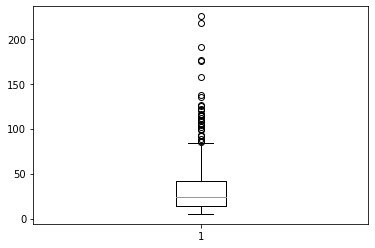

In [38]:
plt.boxplot(df_global['price'])
plt.show()

on remarque les valeurs abérantes représntées par les ronds 

In [39]:
# On ordonne la serie
price = sorted(df_global['price'])
price

[5.2,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 6.3,
 6.5,
 6.5,
 6.5,
 6.7,
 6.8,
 6.8,
 7.0,
 7.0,
 7.1,
 7.1,
 7.1,
 7.2,
 7.4,
 7.4,
 7.5,
 7.6,
 7.6,
 7.7,
 7.8,
 7.8,
 7.9,
 7.9,
 8.1,
 8.2,
 8.4,
 8.5,
 8.5,
 8.6,
 8.6,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.9,
 8.9,
 8.9,
 9.0,
 9.0,
 9.1,
 9.1,
 9.2,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.4,
 9.5,
 9.5,
 9.6,
 9.6,
 9.7,
 9.7,
 9.7,
 9.8,
 9.8,
 9.8,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 10.1,
 10.1,
 10.2,
 10.2,
 10.3,
 10.3,
 10.4,
 10.4,
 10.6,
 10.6,
 10.7,
 10.7,
 10.7,
 10.7,
 10.8,
 10.8,
 10.8,
 10.9,
 10.9,
 11.0,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.3,
 11.3,
 11.5,
 11.5,
 11.6,
 11.6,
 11.6,
 11.8,
 11.9,
 11.9,
 11.9,
 11.9,
 11.9,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.1,
 12.1,
 12.1,
 12.2,
 12.3,
 12.3,
 12.5,
 12.5,
 12.5,
 12.6,
 12.6,
 12.6,
 12.6,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.9,
 12.9,
 12.9,
 12.9,
 12.9,
 13.0,
 13.1,
 13.1,
 13.

In [40]:
# On calcule l'interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

Q1 => 14.1
Q3 => 42.175000000000004
IQR => 28.075000000000003


In [41]:
# On calcule les valeurs limite
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

Lower_bound => -28.012500000000003
Upper_bound => 84.28750000000001


In [42]:
# On cherche les outliers
result = df_global[(df_global['price'] > upper_bound) | (df_global['price'] < lower_bound)]
result

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre_affaire
154,4115,15382,1,100.0,11,instock,15382,0.0,0.0,0.0,...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
156,4132,11668,1,88.4,5,instock,11668,0.0,0.0,0.0,...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
291,4352,15940,1,225.0,0,outofstock,15940,0.0,0.0,0.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
293,4355,12589,1,126.5,2,instock,12589,0.0,0.0,0.0,...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
297,4359,13853,1,85.6,0,outofstock,13853,0.0,0.0,0.0,...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
310,4402,3510,1,176.0,8,instock,3510,0.0,0.0,0.0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
311,4404,3507,1,108.5,2,instock,3507,0.0,0.0,0.0,...,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
313,4406,7819,1,157.0,3,instock,7819,0.0,0.0,0.0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
314,4407,3509,1,104.0,6,instock,3509,0.0,0.0,0.0,...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
320,4582,12857,1,109.6,7,instock,12857,0.0,0.0,0.0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
